# Use Case 

## ========================================================================

## Importing package and Data 

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

data_s=pd.read_csv('Automobile/automobile-spec.csv')
data_r=pd.read_csv('Automobile/automobile-risk.csv')
data_l=pd.read_csv('Automobile/automobile-losses.csv')

plt.style.use("ggplot")

### Join Data using Merge


As there are 3 seperate table, we use merge "inner join" to merge them into one table

In [2]:
data_join=pd.merge(data_s,data_r,how="inner",on='ID')
data_join=pd.merge(data_join,data_l,how="inner",on='ID')
data_join.head(10)

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling,normalized-losses
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3,NaN
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3,NaN
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1,NaN
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2,164.0
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2,164.0
5,6,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,2,NaN
6,7,audi,gas,std,four,sedan,fwd,front,105.8,192.7,...,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0,1,158.0
7,8,audi,gas,std,four,wagon,fwd,front,105.8,192.7,...,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0,1,NaN
8,9,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0,1,158.0
9,10,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,3.13,3.40,7.0,160.0,5500.0,16,22,NaN,0,NaN


<br>
<br>
We can see that in the last column, there are many <i>NaN</i> values. <br>
Before we are dealing with that, first we want to see type and shape of data using .info()

In [3]:
data_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
ID                   205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         204 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-

<br>
<br>
There are 205 entries data, with some columns that has below 205 entries. This was caused by missing values in that column

In [4]:
data_join.isnull().sum().sort_values(ascending=False).head(10)

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
horsepower            2
num-of-doors          1
width                 0
make                  0
fuel-type             0
dtype: int64

<br>
Above, we can see that there are 7 column with missing values, with normalized-losses is the most missing values column. To deal with this, we drop this column as there were to many missing values. as for others, we use median for numeric values and string "missing" for category

# Handle missing values

because normalized-losses has to many missing values, we drop this variable <br>
For other columns, if its datatype is numeric, we use its column median, and if its datatype is categorical (or object) we use mode in its column

In [5]:
data=pd.DataFrame(data_join)
data=data.drop(columns="normalized-losses",axis=1)

In [6]:
median = data[['bore','stroke','horsepower','peak-rpm','price']].median()
data[['bore','stroke','horsepower','peak-rpm','price']]=data[['bore','stroke','horsepower','peak-rpm','price']].fillna(median)
mode = data['num-of-doors'].mode()[0]
data['num-of-doors']=data['num-of-doors'].fillna(mode)

print(data.isnull().sum().sort_values(ascending=False).head(10))

symboling       0
price           0
make            0
fuel-type       0
aspiration      0
num-of-doors    0
body-style      0
drive-wheel     0
engine-loc      0
wheel-base      0
dtype: int64


<br>
we can see from above that there are no longer any missing values in data
<br>
before we continue to visualization, noted that there are value "?" in column num-of-doors. To be honest we know this after we try to countplot using seaborn (we will do it in the visualization part). first we want to see why there are "?" in our num-of-orders column

In [7]:
print(data['num-of-doors'][data['num-of-doors']=="?"].index)
data.iloc[63,:]

Int64Index([63], dtype='int64')


ID                       64
make                  mazda
fuel-type            diesel
aspiration              std
num-of-doors              ?
body-style            sedan
drive-wheel             fwd
engine-loc            front
wheel-base             98.8
length                177.8
width                  66.5
height                 55.5
curb-weight            2443
engine-type             ohc
cylinder               four
engine-size             122
fuel-system             idi
bore                   3.39
stroke                 3.39
compression-ratio      22.7
horsepower               64
peak-rpm               4650
city-mpg                 36
highway-mpg              42
price                 10795
symboling                 0
Name: 63, dtype: object

<br>
We can use deduct that "?" should be "four" as mazda was a sedan type. We could use regression or any other method to try to classify using other data, but it was to advance for us. So lets just use "four" to replace "?" in this column <br>


In [8]:
data.at[63,'num-of-doors']="four"
data.iloc[63,:]

ID                       64
make                  mazda
fuel-type            diesel
aspiration              std
num-of-doors           four
body-style            sedan
drive-wheel             fwd
engine-loc            front
wheel-base             98.8
length                177.8
width                  66.5
height                 55.5
curb-weight            2443
engine-type             ohc
cylinder               four
engine-size             122
fuel-system             idi
bore                   3.39
stroke                 3.39
compression-ratio      22.7
horsepower               64
peak-rpm               4650
city-mpg                 36
highway-mpg              42
price                 10795
symboling                 0
Name: 63, dtype: object

<br>
Now our data is complete and there are no missing values

## Visualization 

First we divide data into 2, numerical data and categorical data

In [9]:
category=data.columns[[1,2,3,4,5,6,7,13,14,16]]
data_categ=data[category]
data_numer=data
data_numer=data_numer.drop(columns=category,axis=1)
numeric=data_numer.columns
data_categ.describe()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,engine-type,cylinder,fuel-system
count,205,205,205,205,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,116,96,120,202,148,159,94


<br>
Above we can see few descriptive of category data. <br>
To make this data comparable and easy to understand, with datatype category, we use seaborn modules <b><i>countplot</i></b> to plot each column to its frequency 

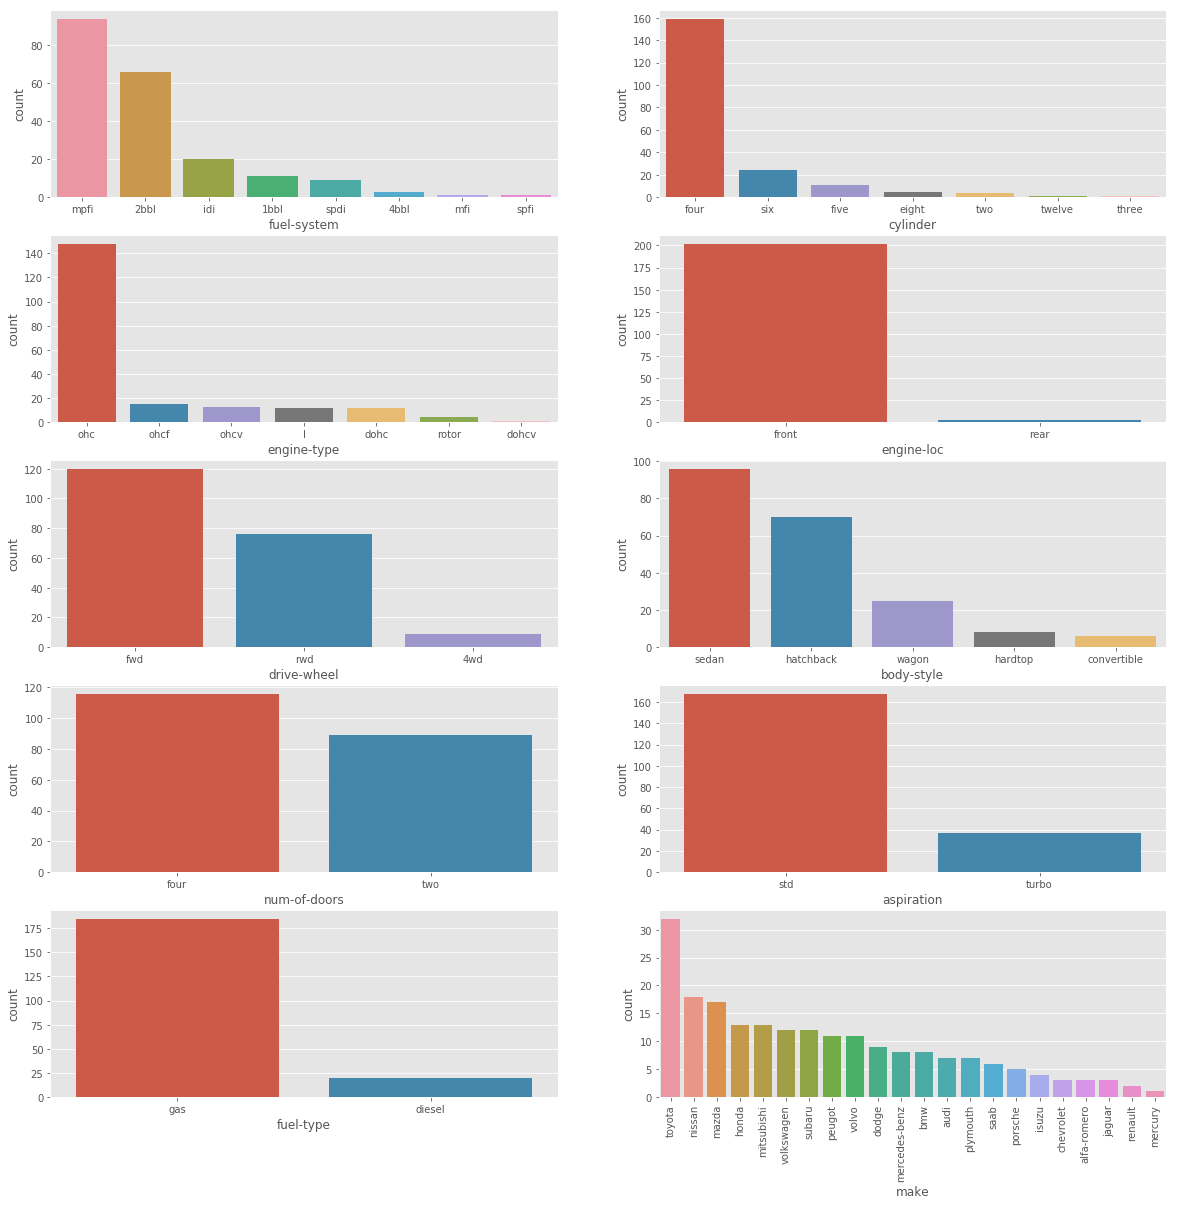

In [10]:
f=plt.figure(figsize=(20,20))
j=10
for i in category:
    f.add_subplot(5,2,j)
    sns.countplot(data_categ[i],order=data_categ[i].value_counts().index)
    
    if j==10:
        plt.xticks(rotation=90)
    j-=1
    
plt.show()

<br>
Using this visualization, we can see efficiently which category is the most frequent and how each category comparisson. For example, we cans ee that in column and viz "make" toyota is the most dominant in data and second is nissan. also in engine_loc, we can see that font engine is far more frequent than rear engine etc.
<br>
<br>
<br>
We can also use pie chart for example to type of body_style

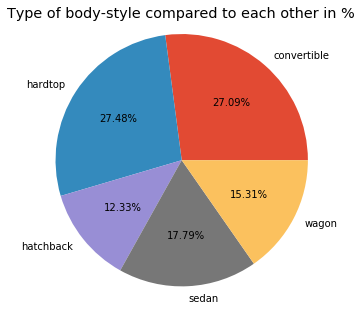

In [11]:
plt.figure(figsize=(5,5))
body_pie=data[['body-style','price']].groupby('body-style').mean()
body_pie.reset_index(level=0,inplace=True)
plt.pie(body_pie['price'],labels=body_pie['body-style'],autopct='%.2f%%')
plt.axis('equal')
plt.title('Type of body-style compared to each other in %')
plt.show()

<br>
<br>
After categorical variable, we analyze numerical variable using viz 
<br> below, we use <b>Bar Plot</b> to analyze wheel_base count in data
<br>

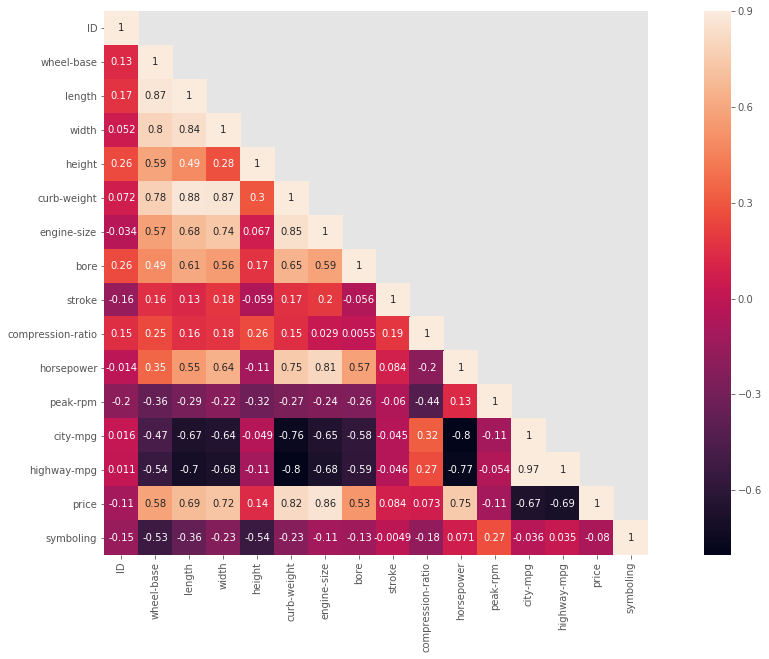

In [18]:
#create correlation with hitmap

#create correlation
corr = data_numer.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (20,5))
fig.set_size_inches(20,10)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

Index(['ID', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'symboling'],
      dtype='object')


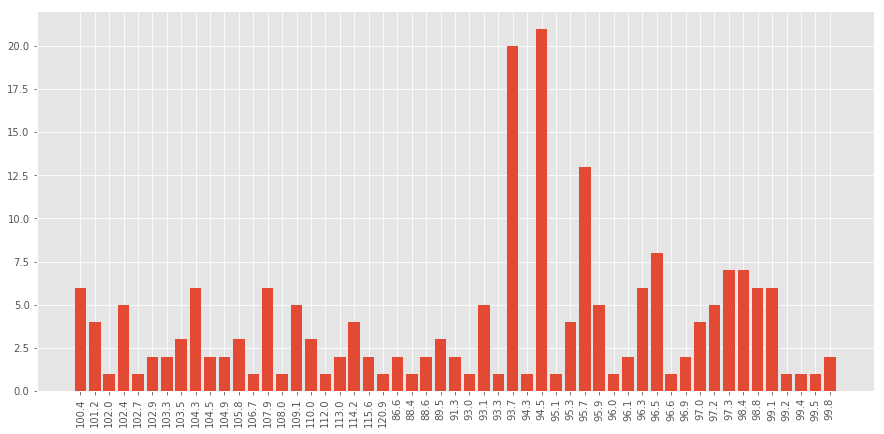

In [65]:
print(data_numer.columns)
data_numer
wheel_base=data_numer['wheel-base'].value_counts()
wheel_base=pd.DataFrame(wheel_base)
wheel_base.columns=['count']
wheel_base.reset_index(level=0,inplace=True)
wheel_base['index']=wheel_base['index'].astype('str')
wheel_base=wheel_base.sort_values("count",ascending=False)
plt.figure(figsize=(15,7))
plt.bar(wheel_base['index'],wheel_base['count'])
plt.xticks(rotation=90,fontsize=10)
plt.show()


<br>
<br>
With this plot we can see the distribution of wheel_base compared to each other. we can see that 94.5 and 94.3 is the most frequent wheel_base
<br>
<br>
We could also use scatter plot to see the conenction between horsepower and price and to see comparisson of city vs highway mpg

Index(['ID', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'symboling'],
      dtype='object')


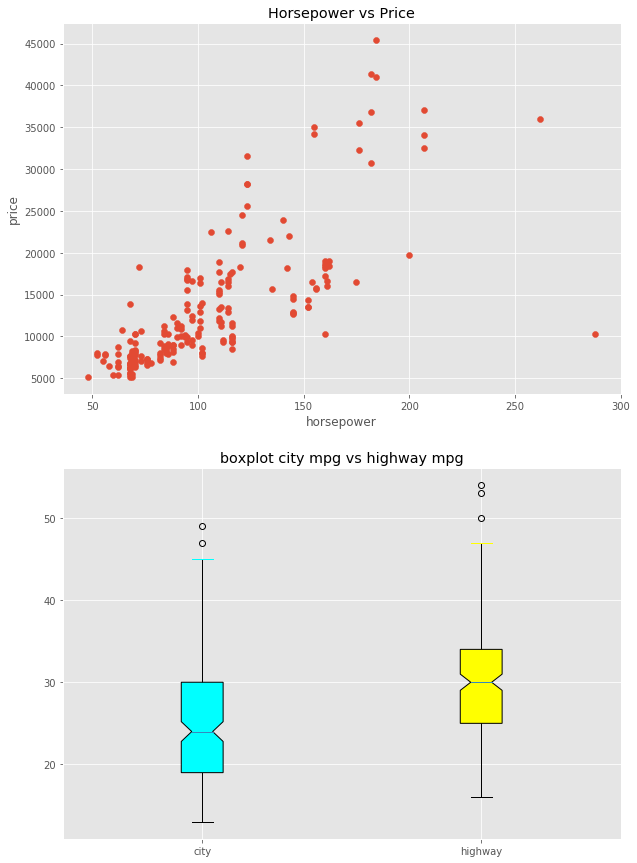

In [66]:
print(data_numer.columns)
f=plt.figure(figsize=(10,15))
f.add_subplot(2,1,1)
plt.scatter(data_numer['horsepower'],data_numer['price'])
plt.title('Horsepower vs Price')
plt.xlabel('horsepower')
plt.ylabel('price')
f.add_subplot(2,1,2)
colors=['cyan','yellow']
arrays=np.array(data_numer[['city-mpg','highway-mpg']])
bp=plt.boxplot(arrays,patch_artist=True,notch=True)
for i in range(len(bp['boxes'])):
    
    bp['boxes'][i].set(facecolor=colors[i])
    
    bp['caps'][2*i + 1].set(color=colors[i])

plt.title('boxplot city mpg vs highway mpg')
plt.xticks([1, 2], ['city', 'highway'])

plt.show()

## Part 2
<br>
### Some question and answer of data

#### 1. Which car brand has the biggest price??

In [98]:
expensive=data[['make','price']].groupby("make").max().sort_values(by='price',ascending=False).head(1)
print("\nThe most expensive car brand is %s with price %.2f" % (expensive.index.values[0],expensive['price']))
expensive


The most expensive car brand is mercedes-benz with price 45400.00


,price
make,
mercedes-benz,45400.0


#### 2. What is the maximum horsepower for car with 6 cylinder engine??

In [102]:
horse=data[['horsepower','cylinder']][data['cylinder']=='six'].max()
print('\nMaximum horsepower for car with 6 cylinder engine is %d' %(horse[0]))
horse


Maximum horsepower for car with 6 cylinder engine is 207


horsepower    207
cylinder      six
dtype: object

#### 3. What is the average peak-rpm for ‘turbo’ style aspiration car???

In [104]:
rpm=data[['peak-rpm','aspiration']][data['aspiration']=='turbo'].mean()
print("\nThe average peak-rpm for turbo style aspiration car is %.3f" %(rpm))
rpm


The average peak-rpm for turbo style aspiration car is 4939.189


peak-rpm    4939.189189
dtype: float64

#### 4. What is the average price based on body_type???

In [106]:
data[['body-style','price']].groupby('body-style').mean().sort_values(by='price',ascending=False)

,price
body-style,
hardtop,22208.500000
convertible,21890.500000
sedan,14372.989583
wagon,12371.960000
hatchback,9967.085714


#### 5. What is the average price based on body-style only for Honda car (make=Honda)

In [259]:
data[['body-style','price']][data['make']=='honda'].groupby('body-style').mean().sort_values(by='price',ascending=False)

,price
body-style,
sedan,9945.000000
wagon,7295.000000
hatchback,7054.428571
